In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('./data/officer_kinship_song.csv')
df2 = pd.read_csv('./data/officer_relationship_song.csv')

In [29]:
df2.isna().any(axis = 0)

Name                   False
姓名                     False
Index year             False
Sex                    False
Associate              False
社会关系人姓名                False
Assoc. Index Year       True
Assoc. Sex             False
Association            False
联系                     False
Address                False
籍贯                     False
X                      False
Y                      False
Assoc. Address         False
联系人籍贯                  False
Assoc. X                True
Assoc. Y                True
Kinship Relation       False
亲属关系                   False
Kin Name               False
亲戚姓名                   False
Assoc. Kinship Rel.    False
关系人的亲属关系               False
Assoc. Kin Name        False
关系人的亲戚姓名               False
Distance 距离             True
Person ID              False
Assoc ID               False
dtype: bool

In [30]:
#df1亲戚表，df2政治关系表
df2.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [31]:
#df2是政治关系表
#从表中取出以下三列，以联系进行分组，分别统计官员和社会关系人的数量
a1 = df2[['姓名', '社会关系人姓名', '联系']].groupby('联系').agg(
    {'姓名': 'nunique', '社会关系人姓名': 'nunique'}).copy()
a1

,姓名,社会关系人姓名
联系,,
不合,35,49
反对/攻讦,58,56
得到Y的支持,55,97
支持,51,49
政见趋同,21,23
遭到Y的反对/攻讦,52,111


In [32]:
a1['无去重计数'] = df2[['姓名', '联系']].groupby('联系').count()
a1

,姓名,社会关系人姓名,无去重计数
联系,,,
不合,35,49,61
反对/攻讦,58,56,78
得到Y的支持,55,97,132
支持,51,49,80
政见趋同,21,23,25
遭到Y的反对/攻讦,52,111,130


In [33]:
#不同联系的平均距离
a1 = df2[r'Distance 距离'].groupby(df2[r'联系']).mean().sort_values()
a1

联系
政见趋同         553.851090
不合           566.486530
反对/攻讦        664.581145
遭到Y的反对/攻讦    689.981035
得到Y的支持       699.818200
支持           703.809609
Name: Distance 距离, dtype: float64

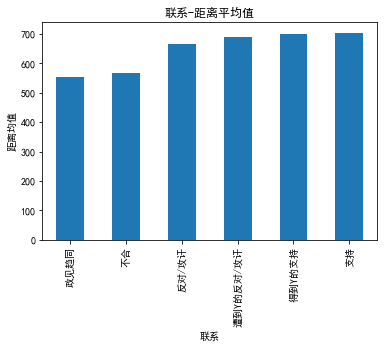

In [34]:
#绘制联系-距离平均值关系图
#方法1
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
# a1.plot(kind='barh')
a1.plot(kind='bar')
plt.title('联系-距离平均值')
plt.xlabel('联系')
plt.ylabel('距离均值')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

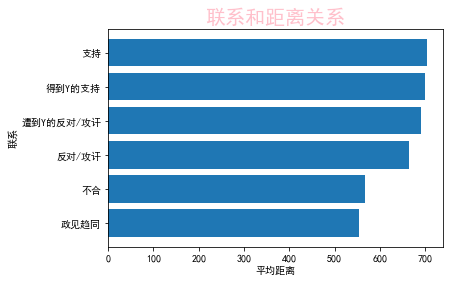

In [35]:
#方法2
plt.barh(a1.index, a1.values)
plt.title('联系和距离关系', size=20, color='pink')
plt.xlabel('平均距离')
plt.ylabel('联系')
plt.show

支持和对抗的关系筛选

In [36]:
#支持型关系
df2.query('联系=="支持"or 联系=="政见趋同" or 联系=="得到Y的支持" ')['Distance 距离'].mean()

685.6485615160855

In [37]:
#对抗型关系筛选
df2.query('联系=="不合"or 联系=="遭到Y的反对/攻讦" or 联系=="反对/攻讦"')['Distance 距离'].mean()

654.5744813763426

## 指数年之差

In [38]:
df2['指数年之差'] = abs(df2['Index year'] - df2['Assoc. Index Year'])
df2


,Name,姓名,Index year,Sex,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,...,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID,指数年之差
0,An Dun,安惇,1042,M,Zou Hao,邹浩,1060.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1275.341259,1,3888,18.0
1,An Dun,安惇,1042,M,Zhang Shiliang,张士良,NaN,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,NaN,1,25065,NaN
2,Chen Jian(2),陈戬,1081,M,Tong Guan,童贯,1054.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,910.189663,31,8124,27.0
3,Cheng Yu,程瑀,1087,M,Wu Min,吴敏,1087.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,370.461638,128,8163,0.0
4,Zhang Shangying,张商英,1043,M,Sima Guang,司马光,1019.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,868.170971,272,1488,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,M,Ouyang Xiu,欧阳修,1007.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1066.098438,12319,1384,7.0
502,Yu Jing,余靖,1000,M,Yin Zhu,尹洙,1001.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1102.124909,12319,7104,1.0
503,Kong Daofu,孔道辅,986,M,Yang Xie,杨偕,980.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,431.228735,15939,2003,6.0
504,Liu Anshang,刘安上,1069,M,Shi Gongbi,石公弼,1061.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,165.947261,17479,13417,8.0


In [39]:
data3 = df2[['联系', '指数年之差']]
data3

,联系,指数年之差
0,反对/攻讦,18.0
1,反对/攻讦,NaN
2,反对/攻讦,27.0
3,反对/攻讦,0.0
4,反对/攻讦,24.0
...,...,...
501,政见趋同,7.0
502,政见趋同,1.0
503,政见趋同,6.0
504,政见趋同,8.0


In [40]:
df2.columns

Index(['Name', '姓名', 'Index year', 'Sex', 'Associate', '社会关系人姓名',
       'Assoc. Index Year', 'Assoc. Sex', 'Association', '联系', 'Address', '籍贯',
       'X', 'Y', 'Assoc. Address', '联系人籍贯', 'Assoc. X', 'Assoc. Y',
       'Kinship Relation', '亲属关系', 'Kin Name', '亲戚姓名', 'Assoc. Kinship Rel.',
       '关系人的亲属关系', 'Assoc. Kin Name', '关系人的亲戚姓名', 'Distance 距离', 'Person ID',
       'Assoc ID', '指数年之差'],
      dtype='object')

In [41]:
df_2 = df2.copy()
df_2.drop(['Sex','Assoc. Sex','Kinship Relation','亲属关系','Kin Name','亲戚姓名','Assoc. Kinship Rel.','关系人的亲属关系','Assoc. Kin Name','关系人的亲戚姓名'],axis = 1,inplace = False)

,Name,姓名,Index year,Associate,社会关系人姓名,Assoc. Index Year,Association,联系,Address,籍贯,X,Y,Assoc. Address,联系人籍贯,Assoc. X,Assoc. Y,Distance 距离,Person ID,Assoc ID,指数年之差
0,An Dun,安惇,1042,Zou Hao,邹浩,1060.0,Opposed or attacked,反对/攻讦,Qujiang,渠江,106.631752,30.477690,Wujin,武进,119.952301,31.782784,1275.341259,1,3888,18.0
1,An Dun,安惇,1042,Zhang Shiliang,张士良,NaN,Opposed or attacked,反对/攻讦,Qujiang,渠江,106.631752,30.477690,[Unknown],[未详],NaN,NaN,NaN,1,25065,NaN
2,Chen Jian(2),陈戬,1081,Tong Guan,童贯,1054.0,Opposed or attacked,反对/攻讦,Songxi,松溪,118.774612,27.528404,Kaifeng,开封,114.343330,34.785477,910.189663,31,8124,27.0
3,Cheng Yu,程瑀,1087,Wu Min,吴敏,1087.0,Opposed or attacked,反对/攻讦,Fuliang,浮梁,117.236359,29.382742,Yangzi,扬子,119.177627,32.267544,370.461638,128,8163,0.0
4,Zhang Shangying,张商英,1043,Sima Guang,司马光,1019.0,Opposed or attacked,反对/攻讦,Xinjin,新津,103.810936,30.423536,Xia Xian,夏县,111.220055,35.137451,868.170971,272,1488,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,Ouyang Xiu,欧阳修,1007.0,Agreed with views of,政见趋同,Qujiang,曲江,113.603417,24.810209,Xinzheng,新郑,113.719086,34.397324,1066.098438,12319,1384,7.0
502,Yu Jing,余靖,1000,Yin Zhu,尹洙,1001.0,Agreed with views of,政见趋同,Qujiang,曲江,113.603417,24.810209,Luoyang,洛阳,112.382630,34.665276,1102.124909,12319,7104,1.0
503,Kong Daofu,孔道辅,986,Yang Xie,杨偕,980.0,Agreed with views of,政见趋同,Xianyuan,仙源,116.986059,35.597553,Luoyang,洛阳,112.382630,34.665276,431.228735,15939,2003,6.0
504,Liu Anshang,刘安上,1069,Shi Gongbi,石公弼,1061.0,Agreed with views of,政见趋同,Yongjia,永嘉,120.653221,28.018291,Xinchang,新昌,120.902107,29.494654,165.947261,17479,13417,8.0


In [42]:
df_2.dropna(axis='index',how='all',inplace = True)
df_2

,Name,姓名,Index year,Sex,Associate,社会关系人姓名,Assoc. Index Year,Assoc. Sex,Association,联系,...,Kin Name,亲戚姓名,Assoc. Kinship Rel.,关系人的亲属关系,Assoc. Kin Name,关系人的亲戚姓名,Distance 距离,Person ID,Assoc ID,指数年之差
0,An Dun,安惇,1042,M,Zou Hao,邹浩,1060.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1275.341259,1,3888,18.0
1,An Dun,安惇,1042,M,Zhang Shiliang,张士良,NaN,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,NaN,1,25065,NaN
2,Chen Jian(2),陈戬,1081,M,Tong Guan,童贯,1054.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,910.189663,31,8124,27.0
3,Cheng Yu,程瑀,1087,M,Wu Min,吴敏,1087.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,370.461638,128,8163,0.0
4,Zhang Shangying,张商英,1043,M,Sima Guang,司马光,1019.0,M,Opposed or attacked,反对/攻讦,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,868.170971,272,1488,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Yu Jing,余靖,1000,M,Ouyang Xiu,欧阳修,1007.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1066.098438,12319,1384,7.0
502,Yu Jing,余靖,1000,M,Yin Zhu,尹洙,1001.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,1102.124909,12319,7104,1.0
503,Kong Daofu,孔道辅,986,M,Yang Xie,杨偕,980.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,431.228735,15939,2003,6.0
504,Liu Anshang,刘安上,1069,M,Shi Gongbi,石公弼,1061.0,M,Agreed with views of,政见趋同,...,Wei Xiang,未详,U,未详,Wei Xiang,未详,165.947261,17479,13417,8.0


In [43]:
#检查整行重复
df_2.duplicated().sum()

23

In [44]:
#检查部分字段的重复情况
#亲戚表
df1.duplicated(['姓名','亲戚姓名']).sum()

1324

对政治表去重

In [45]:
df_2.drop_duplicates(inplace=True)
df_2.duplicated().sum()

0

In [46]:
#对亲戚表进行去重
df_1 = df1.copy()

In [47]:
df_1.drop_duplicates()

,Name,姓名,Kin Name,亲戚姓名,Kinship
0,An Dun,安惇,An Fang,安邡,S
7,An Dun,安惇,An Bin,安邠,S
14,An Dun,安惇,An Jiao,安郊,S1
21,An Dun,安惇,An Bang,安邦,S2
28,Chen Jian(2),陈戬,Chen Ding(2),陈鼎,S1
...,...,...,...,...,...
1940,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Li Rende,李仁德,F
1941,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Zhao Zhen,赵祯,S
1942,Li Shi(Mother of Zhao Zhen),李氏(赵祯母),Li Yonghe,李用和,B-
1943,Shi Tingchen,施庭臣,Shi Yuanran,施渊然,S


In [48]:
#统计出每个官员的联系
df_2[['姓名','联系']].groupby(['姓名','联系']).agg({'联系':'count'})

联系
姓名  联系           
丁谓  得到Y的支持      1
    支持          1
    遭到Y的反对/攻讦   4
万俟卨 支持          1
令狐挻 支持          1
...            ..
高若讷 反对/攻讦       1
    遭到Y的反对/攻讦   1
鲁宗道 得到Y的支持      1
黄庭坚 遭到Y的反对/攻讦   1
黄策  反对/攻讦       1

[272 rows x 1 columns]

行转列

In [49]:
#行转列
a = df_2[['姓名','联系']].groupby(['姓名','联系']).agg({'联系':'count'}).unstack()
a

联系                                 
联系   不合 反对/攻讦 得到Y的支持   支持 政见趋同 遭到Y的反对/攻讦
姓名                                      
丁谓  NaN   NaN    1.0  1.0  NaN       4.0
万俟卨 NaN   NaN    NaN  1.0  NaN       NaN
令狐挻 NaN   NaN    NaN  1.0  NaN       NaN
何执中 NaN   NaN    NaN  NaN  NaN       2.0
余靖  NaN   NaN    2.0  1.0  2.0       1.0
..   ..   ...    ...  ...  ...       ...
高登  NaN   1.0    NaN  1.0  NaN       NaN
高若讷 NaN   1.0    NaN  NaN  NaN       1.0
鲁宗道 NaN   NaN    1.0  NaN  NaN       NaN
黄庭坚 NaN   NaN    NaN  NaN  NaN       1.0
黄策  NaN   1.0    NaN  NaN  NaN       NaN

[188 rows x 6 columns]

In [50]:
#level参数修改，列名转换
df_2[['姓名','联系']].groupby(['姓名','联系']).agg({'联系':'count'}).unstack(level= 0)


联系                                                   ...       \
姓名          丁谓  万俟卨  令狐挻  何执中   余靖   侯蒙   冯京  刘安上  刘安世 刘氏(赵恒皇后)  ...   韩缜   
联系                                                               ...        
不合         NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN      NaN  ...  NaN   
反对/攻讦      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0      1.0  ...  1.0   
得到Y的支持     1.0  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN      NaN  ...  NaN   
支持         1.0  1.0  1.0  NaN  1.0  NaN  1.0  NaN  NaN      NaN  ...  NaN   
政见趋同       NaN  NaN  NaN  NaN  2.0  NaN  NaN  1.0  NaN      NaN  ...  NaN   
遭到Y的反对/攻讦  4.0  NaN  NaN  2.0  1.0  NaN  NaN  NaN  1.0      NaN  ...  NaN   

                                                           
姓名          马伸  马知节 高氏(赵曙妻)   高琼   高登  高若讷  鲁宗道  黄庭坚   黄策  
联系                                                         
不合         NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
反对/攻讦      NaN  1.0     1.0  NaN  1.0  1.0  NaN  NaN  1.0  
得到Y的支持     1.0  NaN     NaN  NaN  NaN  NaN  1.0  NaN  NaN  
支持         NaN  NaN     1.0  1.0  1.0  NaN  NaN  NaN  NaN  
政见趋同       NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
遭到Y的反对/攻讦  NaN  NaN     NaN  NaN  NaN  1.0  NaN  1.0  NaN  

[6 rows x 188 columns]

## 取同时是官员的亲戚

In [51]:
#取所有官员的集合
offier= set(df2['姓名'])
offier

{'丁谓',
 '万俟卨',
 '令狐挻',
 '何执中',
 '余靖',
 '侯蒙',
 '冯京',
 '刘安上',
 '刘安世',
 '刘氏(赵恒皇后)',
 '刘筠',
 '刘錡',
 '卢多逊',
 '句龙如渊',
 '叶祖洽',
 '司马光',
 '向子諲',
 '向宗良',
 '吕大防',
 '吕夷简',
 '吕惠卿',
 '吕诲',
 '吕颐浩',
 '吴充',
 '吴懋',
 '吴玠',
 '周嘉正',
 '周敦颐',
 '唐介',
 '唐重',
 '夏竦',
 '孔道辅',
 '孙固',
 '孙览',
 '孟彦卿',
 '孟氏(赵煦妻)',
 '安惇',
 '安扶',
 '宋乔年',
 '宗泽',
 '寇准',
 '富弼',
 '尹洙',
 '岳飞',
 '师骥',
 '常安民',
 '常秩',
 '张九成',
 '张商英',
 '张士逊',
 '张康国',
 '张扩',
 '张知白',
 '张载',
 '张逊',
 '张邵',
 '彭思永',
 '彭汝砺',
 '施庭臣',
 '施昌言',
 '晏殊',
 '曹修古',
 '曹利用',
 '曾布',
 '曾肇',
 '朱胜非',
 '李光',
 '李处耘',
 '李宾王',
 '李师中',
 '李弥大',
 '李氏(赵祯母)',
 '李渭',
 '李纲',
 '李迪',
 '李邦彦',
 '李邴',
 '杜衍',
 '杨偕',
 '杨徽之',
 '杨愿',
 '杨畏',
 '杨覃',
 '柳瑊',
 '柴禹锡',
 '江褒',
 '汪伯彦',
 '汪藻',
 '沈季长',
 '沈辽',
 '洪皓',
 '温益',
 '潘美',
 '潘良贵',
 '狄青',
 '王公彦',
 '王安石',
 '王安礼',
 '王尧臣',
 '王旦',
 '王显',
 '王珪',
 '王畴',
 '王祖道',
 '王纶',
 '王钦若',
 '王震',
 '王黼',
 '皮公弼',
 '石介',
 '祖无择',
 '种师道',
 '秦桧',
 '秦熺',
 '程琳',
 '程瑀',
 '程颐',
 '章惇',
 '章綡',
 '章縡',
 '胡则',
 '胡宗愈',
 '胡宪',
 '胡宿',
 '胡瑗',
 '胥偃',
 '苏安世',
 '苏舜钦',
 '苏轼',
 '苏辙',
 '苗傅',
 '范仲淹',
 '范

In [52]:
#取所有亲戚的集合
kin =set(df1['亲戚姓名'])
kin

{'丁D',
 '丁玘',
 '丁珙',
 '丁珝',
 '丁珷',
 '丁说',
 '丁诵',
 '丁谏',
 '丁颢',
 '万俟湜',
 '万俟虎',
 '何佾',
 '何君平',
 '何志同',
 '余仲询',
 '余伯庄',
 '余叔英',
 '余庆',
 '冯式',
 '冯询',
 '冯谌',
 '刘C',
 '刘仲武',
 '刘伯英',
 '刘光远',
 '刘克臣',
 '刘尧仁',
 '刘尧佐',
 '刘尧勛',
 '刘延庆',
 '刘弢',
 '刘益',
 '刘美',
 '刘航',
 '刘诚',
 '刘诰',
 '刘谠',
 '刘通',
 '刘麟',
 '勾龙似',
 '勾龙佃',
 '勾龙僎',
 '卢亿',
 '卢宽',
 '卢察',
 '卢雍',
 '叶祖谊',
 '司马康',
 '司马旦',
 '司马池',
 '向宗回',
 '向宗明',
 '向洺',
 '向浯',
 '向涪',
 '向澹',
 '向经',
 '吕公孺',
 '吕公弼',
 '吕公着',
 '吕公绰',
 '吕升卿',
 '吕和卿',
 '吕大临',
 '吕大忠',
 '吕大钧',
 '吕寅伯',
 '吕当',
 '吕抗',
 '吕搢',
 '吕摭',
 '吕擢',
 '吕景山',
 '吕渊',
 '吕温卿',
 '吕璹',
 '吕由庚',
 '吕由诚',
 '吕荀',
 '吕蒙亨',
 '吕蕡',
 '吕谅卿',
 '吴京',
 '吴安持',
 '吴安诗',
 '吴待问',
 '吴愈',
 '吴扆',
 '吴拱',
 '吴揔',
 '吴撝',
 '吴方',
 '吴璘',
 '吴育',
 '吴诰',
 '周寿',
 '周彦先',
 '周焘',
 '周茂先',
 '周辅成',
 '周述',
 '唐义问',
 '唐之问',
 '唐嘉问',
 '唐待问',
 '唐拱',
 '唐淑问',
 '夏安期',
 '夏承皓',
 '孔勗',
 '孔宗翰',
 '孔陶',
 '孙亿',
 '孙朴',
 '孙竣',
 '孙觉',
 '孟在',
 '孟忠厚',
 '安焘',
 '安邠',
 '安邡',
 '安邦',
 '安郊',
 '宋充国',
 '宋升',
 '宋昪',
 '宗夔',
 '宗沃',
 '宗舜卿',
 '宗颖',
 '寇湘',
 '寇相',
 '富绍京',
 '富绍庭',
 '富

In [53]:
kin_offier=offier&kin
list1 = list(kin_offier)
list1

['章縡',
 '韩琦',
 '王安礼',
 '章綡',
 '范纯礼',
 '赵祯',
 '苏轼',
 '曾布',
 '范仲淹',
 '韩忠彦',
 '曾肇',
 '王安石',
 '范纯仁',
 '赵顼',
 '苏辙']

In [54]:
df_1.drop_duplicates(inplace=True)


In [55]:
#统计亲戚中官员数量
df_1.query('亲戚姓名=="曾布" or 亲戚姓名=="曾肇" or  亲戚姓名=="王安石" or 亲戚姓名=="王安礼" or 亲戚姓名=="章綡" or 亲戚姓名=="章縡" or 亲戚姓名=="苏轼" or 亲戚姓名=="苏辙" or 亲戚姓名=="范仲淹" or 亲戚姓名=="范纯仁" or 亲戚姓名=="范纯礼" or 亲戚姓名=="赵祯" or 亲戚姓名=="赵顼" or 亲戚姓名=="韩忠彦" or 亲戚姓名=="韩琦"')

,Name,姓名,Kin Name,亲戚姓名,Kinship
228,Fan Chunren,范纯仁,Fan Chunli,范纯礼,B-
264,Fan Chunren,范纯仁,Fan Zhongyan,范仲淹,F
309,Fan Chunli,范纯礼,Fan Chunren,范纯仁,B+
311,Fan Chunli,范纯礼,Fan Zhongyan,范仲淹,F
346,Han Qi,韩琦,Han Zhongyan,韩忠彦,S1
385,Han Zhongyan,韩忠彦,Han Qi,韩琦,F
706,Su Zhe,苏辙,Su Shi,苏轼,B+
818,Zeng Bu,曾布,Zeng Zhao,曾肇,B-
850,Wang Anli,王安礼,Wang Anshi,王安石,B+
852,Wang Anshi,王安石,Wang Anli,王安礼,B-


In [56]:
#另一种方法
df_1[df_1['亲戚姓名'].isin(list1)]

,Name,姓名,Kin Name,亲戚姓名,Kinship
228,Fan Chunren,范纯仁,Fan Chunli,范纯礼,B-
264,Fan Chunren,范纯仁,Fan Zhongyan,范仲淹,F
309,Fan Chunli,范纯礼,Fan Chunren,范纯仁,B+
311,Fan Chunli,范纯礼,Fan Zhongyan,范仲淹,F
346,Han Qi,韩琦,Han Zhongyan,韩忠彦,S1
385,Han Zhongyan,韩忠彦,Han Qi,韩琦,F
706,Su Zhe,苏辙,Su Shi,苏轼,B+
818,Zeng Bu,曾布,Zeng Zhao,曾肇,B-
850,Wang Anli,王安礼,Wang Anshi,王安石,B+
852,Wang Anshi,王安石,Wang Anli,王安礼,B-


In [57]:
#另一种方法
abc = df_1.query('亲戚姓名 in @kin_offier')
abc

,Name,姓名,Kin Name,亲戚姓名,Kinship
228,Fan Chunren,范纯仁,Fan Chunli,范纯礼,B-
264,Fan Chunren,范纯仁,Fan Zhongyan,范仲淹,F
309,Fan Chunli,范纯礼,Fan Chunren,范纯仁,B+
311,Fan Chunli,范纯礼,Fan Zhongyan,范仲淹,F
346,Han Qi,韩琦,Han Zhongyan,韩忠彦,S1
385,Han Zhongyan,韩忠彦,Han Qi,韩琦,F
706,Su Zhe,苏辙,Su Shi,苏轼,B+
818,Zeng Bu,曾布,Zeng Zhao,曾肇,B-
850,Wang Anli,王安礼,Wang Anshi,王安石,B+
852,Wang Anshi,王安石,Wang Anli,王安礼,B-


In [58]:
#修改表格并保存
a['亲戚为官数'] =abc[['亲戚姓名','姓名']].groupby('姓名').count()
a.fillna(0,inplace = True)
a.to_csv('./修改后的csv文件.csv',encoding='utf_8_sig')
a

联系                                  亲戚为官数
联系    不合 反对/攻讦 得到Y的支持   支持 政见趋同 遭到Y的反对/攻讦      
姓名                                             
丁谓   0.0   0.0    1.0  1.0  0.0       4.0   0.0
万俟卨  0.0   0.0    0.0  1.0  0.0       0.0   0.0
令狐挻  0.0   0.0    0.0  1.0  0.0       0.0   0.0
何执中  0.0   0.0    0.0  0.0  0.0       2.0   0.0
余靖   0.0   0.0    2.0  1.0  2.0       1.0   0.0
..   ...   ...    ...  ...  ...       ...   ...
高登   0.0   1.0    0.0  1.0  0.0       0.0   0.0
高若讷  0.0   1.0    0.0  0.0  0.0       1.0   0.0
鲁宗道  0.0   0.0    1.0  0.0  0.0       0.0   0.0
黄庭坚  0.0   0.0    0.0  0.0  0.0       1.0   0.0
黄策   0.0   1.0    0.0  0.0  0.0       0.0   0.0

[188 rows x 7 columns]

In [62]:
#读取刚刚保存的表格
dfdf = pd.read_csv(r'./修改后的csv文件.csv',index_col='姓名')
dfdf

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,Unnamed: 7
姓名,,,,,,,
丁谓,0,0,1,1,0,4,0
万俟卨,0,0,0,1,0,0,0
令狐挻,0,0,0,1,0,0,0
何执中,0,0,0,0,0,2,0
余靖,0,0,2,1,2,1,0
...,...,...,...,...,...,...,...
高登,0,1,0,1,0,0,0
高若讷,0,1,0,0,0,1,0
鲁宗道,0,0,1,0,0,0,0


In [63]:
from  sklearn.cluster import KMeans

In [64]:
print(KMeans(n_clusters=2,random_state=0).fit(dfdf).labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [65]:
#给聚类定义标签
dfdf['聚类标签'] = KMeans(n_clusters=2,random_state=0).fit(dfdf).labels_
dfdf

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,Unnamed: 7,聚类标签
姓名,,,,,,,,
丁谓,0,0,1,1,0,4,0,1
万俟卨,0,0,0,1,0,0,0,1
令狐挻,0,0,0,1,0,0,0,1
何执中,0,0,0,0,0,2,0,1
余靖,0,0,2,1,2,1,0,1
...,...,...,...,...,...,...,...,...
高登,0,1,0,1,0,0,0,1
高若讷,0,1,0,0,0,1,0,1
鲁宗道,0,0,1,0,0,0,0,1


In [66]:
#尝试分成多组
dfdf['聚类标签'] = KMeans(n_clusters=4,random_state=0).fit(dfdf).labels_
dfdf.query("聚类标签 == 2")

,不合,反对/攻讦,得到Y的支持,支持,政见趋同,遭到Y的反对/攻讦,Unnamed: 7,聚类标签
姓名,,,,,,,,
司马光,2,2,10,0,0,7,0,2
王安石,5,0,5,1,1,9,0,2
章惇,1,1,8,2,0,15,0,2


In [67]:
data1 =dfdf[['得到Y的支持','支持','政见趋同','反对/攻讦','遭到Y的反对/攻讦','不合','Unnamed: 7','聚类标签']]
data1 =dfdf[['得到Y的支持','支持','政见趋同','反对/攻讦','遭到Y的反对/攻讦','不合','Unnamed: 7','聚类标签']]
data1

,得到Y的支持,支持,政见趋同,反对/攻讦,遭到Y的反对/攻讦,不合,Unnamed: 7,聚类标签
姓名,,,,,,,,
丁谓,1,1,0,0,4,0,0,0
万俟卨,0,1,0,0,0,0,0,0
令狐挻,0,1,0,0,0,0,0,0
何执中,0,0,0,0,2,0,0,0
余靖,2,1,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...
高登,0,1,0,1,0,0,0,0
高若讷,0,0,0,1,1,0,0,0
鲁宗道,1,0,0,0,0,0,0,0
